In [2]:
import mnist_reader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


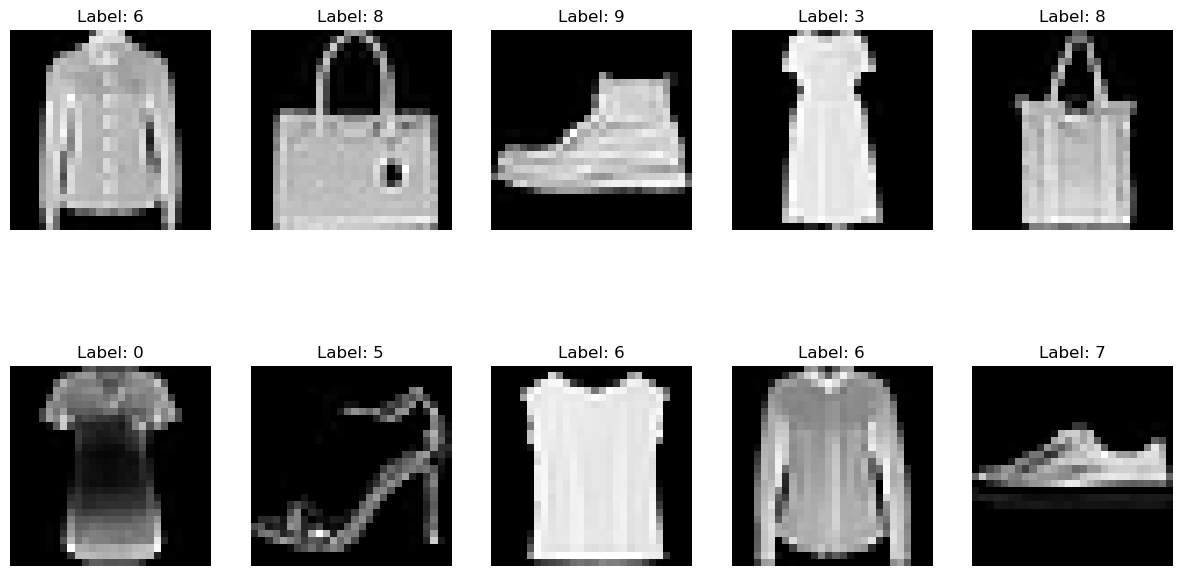

In [32]:
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {y_train[i]}")
plt.show()

In [5]:
print(y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=0.25, 
    random_state=42
)

km = KMeans(n_clusters=10,n_init='auto', random_state=42)
km.fit(X_train)
predict_km = km.predict(X_val)

#label alignment 
labels = np.zeros_like(predict_km)
for i in range(10):  
    mask = (predict_km == i)
    labels[mask] = mode(y_val[mask])[0]

accuracy = accuracy_score(y_val, labels)
print("정확도:", accuracy)


정확도: 0.5952


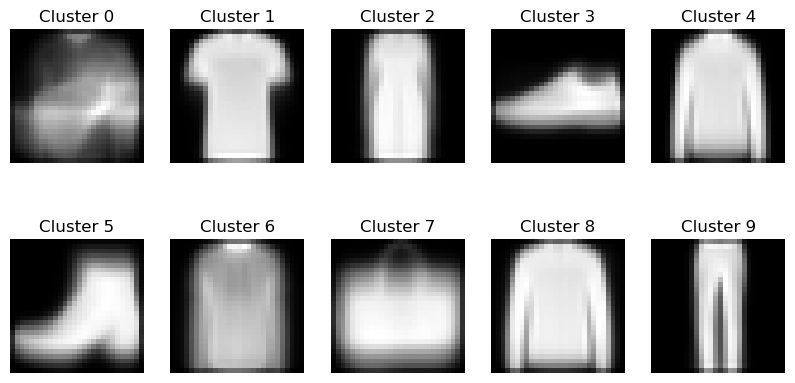

In [20]:
centers = km.cluster_centers_.reshape(10, 28, 28)  # (클러스터수, 높이, 너비)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(centers[i], cmap='gray')
    ax.set_title(f"Cluster {i}")
    ax.axis('off')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(n_jobs=-1,max_iter=100,random_state=42)
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_val)

print(accuracy_score(y_val, predict_lr))

0.8516666666666667


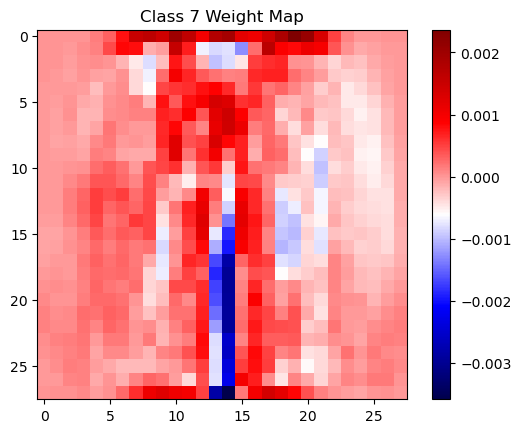

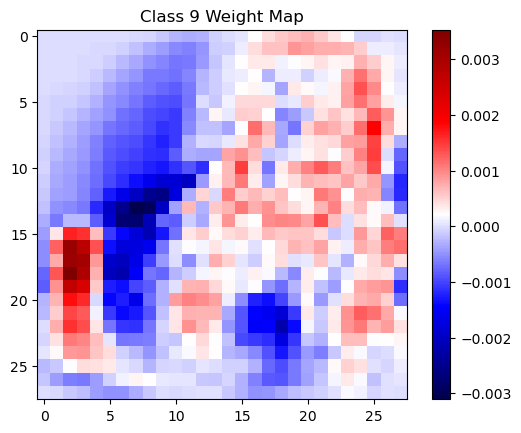

In [34]:
plt.imshow(lr.coef_[1].reshape(28,28), cmap='seismic')
plt.title("Class 7 Weight Map")
plt.colorbar()
plt.show()

plt.imshow(lr.coef_[9].reshape(28,28), cmap='seismic')
plt.title("Class 9 Weight Map")
plt.colorbar()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=15,random_state=42)
dt.fit(X_train, y_train)
predict_dt = dt.predict(X_val)
print(accuracy_score(y_val, predict_dt))

0.8016
트리 깊이: 20


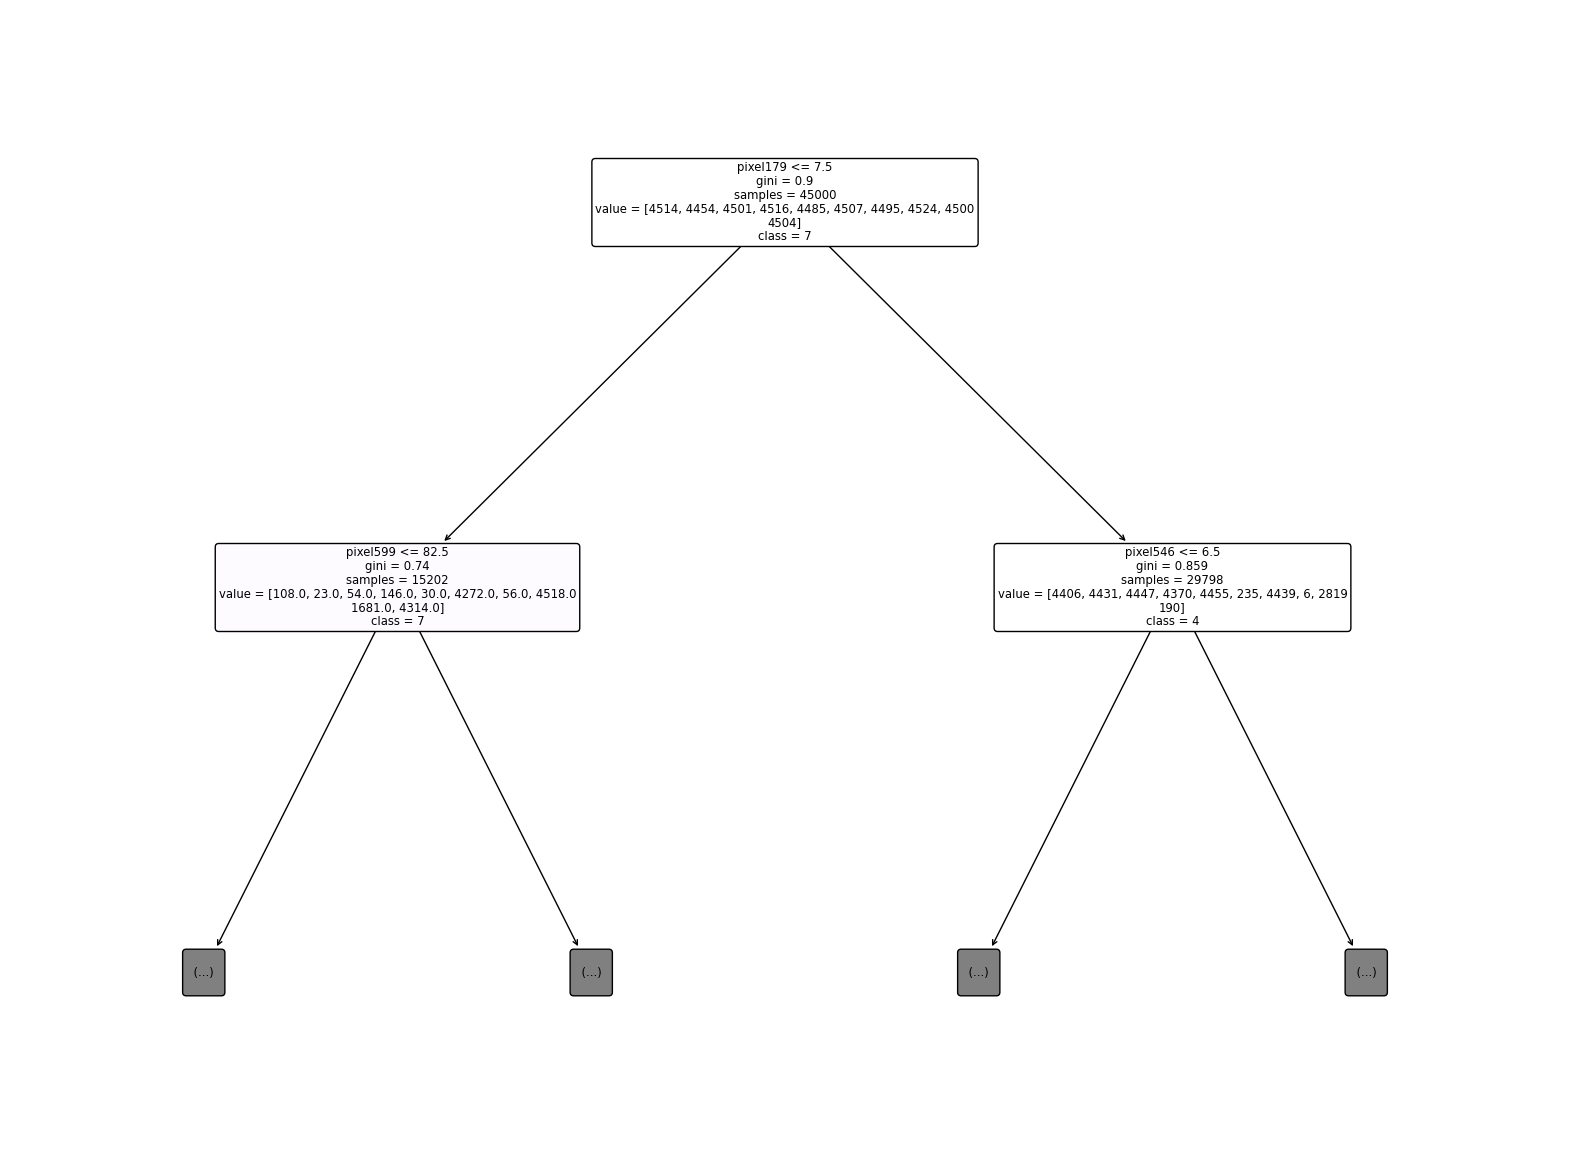

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

# feature_names: 문자열 리스트로 변환 (예: pixel0, pixel1, ...)
feature_names = [f'pixel{i}' for i in range(X_train.shape[1])]

# class_names: 고유 라벨값을 문자열로 변환
class_names = [str(c) for c in np.unique(y_train)]

tree.plot_tree(
    dt,
    max_depth=1,
    class_names=class_names,      # 문자열 리스트
    feature_names=feature_names,  # 문자열 리스트
    impurity=True,
    filled=True,
    rounded=True
)
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, max_depth=15)
rf.fit(X_train, y_train)
predict_rf = rf.predict(X_val)
print(accuracy_score(y_val, predict_rf))

0.8748666666666667


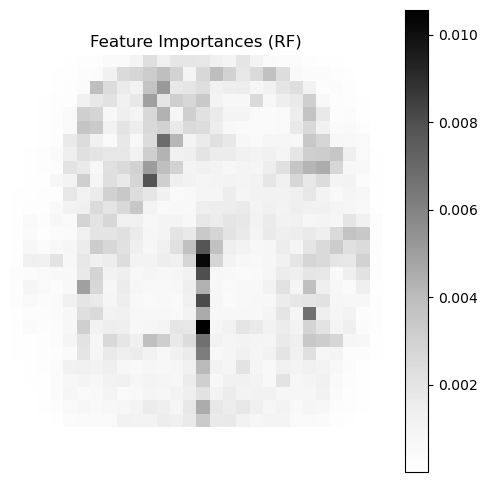

In [40]:
import numpy as np

importances = rf.feature_importances_
plt.figure(figsize=(6, 6))
plt.imshow(importances.reshape(28, 28), cmap='Greys')
plt.title("Feature Importances (RF)")
plt.axis('off')
plt.colorbar()
plt.show()